<a href="https://colab.research.google.com/github/pineapple-666/Lead-Quality-Marketing-Optimization-Analysis/blob/main/Lead_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploring

In [ ]:
import pandas as pd
import numpy as np
%precision 3
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.read_excel('/content/drive/MyDrive/Analyst_case_study_dataset_1_(1).xls')

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,2009-04-21 07:22:59.000,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,2009-08-03 19:39:02.000,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2009-06-30 18:14:33.043,amy,ahokett@sjc.edu,F42BBDFB-D44B-4890-A1B6-D1F0A3838214,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,www.att.net,DebtReductionInc,Debt Consolidation,NaN,NaN,http://www.att.net/s/s.dll,spage=search/error.htm&searchtype=epa&source=a...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3017,2009-04-25 16:56:53.670,brandy,brandy75137@yahoo.com,EA3703A3-61C9-40CE-92F7-61F0E02B1365,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7025449865608971&dt=124069479896...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
3018,2009-04-12 18:38:43.067,jennifer,jennifer_woods48375@yahoo.com,64EB2632-E29E-4EB4-B361-45F1F0C735B5,NaN,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,search.yahoo.com,DebtReductionInc,Debt Consolidation,NaN,debt consolidation or settlement which is better,http://search.yahoo.com/search,ei=UTF-8&fr=yfp-t-501&SpellState=n-1665662351_...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3019,2009-09-23 21:41:08.193,debra,debraroque@att.net,9126C7DB-F5BB-4CE1-BDCF-5E6F1841ADAD,NaN,w-302252-DebtReduction1-1DC-yellowarrow-dark,TopLeft-302252,DebtReductionInc,5.0,5.0,...,Google,NaN,state,Debt Negotiation,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=.

In [ ]:
lead_raw = pd.read_excel('/content/drive/MyDrive/Analyst_case_study_dataset_1_(1).xls')

In [ ]:
lead_raw.dtypes

,0
LeadCreated,datetime64[ns]
FirstName,object
Email,object
VendorLeadID,object
CallStatus,object
WidgetName,object
PublisherZoneName,object
PublisherCampaignName,object
AddressScore,float64
PhoneScore,float64


In [ ]:
lead_raw.shape

(3021, 24)

In [ ]:
lead_raw.sample(5)

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
2144,2009-06-01 11:35:49.983,Randi,declined@delcine.com,C378B57B-8FCF-4230-944C-9E33DB94486D,NaN,w-300250-DebtReduction1-1DC,Top Right-300x250,DebtReductionCallCenter,NaN,NaN,...,Call_Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://callcenter.inadcoads.com/callcenter/si...,utm_source=Call_Center
1987,2009-04-15 09:55:20.347,manuel,viper11231@yahoo.com,96EC0968-7DFE-4F7C-947A-F97F9AB73DC4,NaN,w-300250-DebtReduction1-2DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,search.yahoo.com,DebtReductionInc,General Debt,NaN,debt busters,http://search.yahoo.com/search,p=debt busters&fr=yfp-t-501-s&toggle=1&cop=mss...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
757,2009-09-17 07:18:49.307,SHIRLEY,SMPD1238@WMCONNECT.COM,1D4C5380-8325-498B-948E-DF5AECB6A033,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,5.0,...,google,websearch.cs.com,Debt Holding Tank,Holding Tank - Debt,Netdebt,NaN,http://websearch.cs.com/wm/search,query=WWWNETDEBT%2ECOM&fromPage=WMTRoll,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
2896,2009-07-15 14:08:33.733,Kerrie,kerriebear08@yahoo.com,86E8C9DD-758D-48E1-8DAA-EA57237882C1,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt bailout,debt bailout,http://www.google.com/search,client=safari&rls=en-us&q=debt bailout&ie=UTF-...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
3010,2009-06-19 11:00:41.000,Lucy,lucyaac@yahh.com,Z-OkvmLqCE20wNaeS__oOg,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-yellowarrow-blue,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,search.yahoo.com,DebtReductionInc,Student Debt,NaN,student loan default,http://search.yahoo.com/search,p=student loan default&ei=utf-8&fr=b1ie7,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...


In [ ]:
lead_raw.isna().sum()

,0
LeadCreated,0
FirstName,0
Email,0
VendorLeadID,8
CallStatus,2140
WidgetName,0
PublisherZoneName,0
PublisherCampaignName,0
AddressScore,1850
PhoneScore,1628


In [ ]:
lead_raw.nunique()

,0
LeadCreated,2786
FirstName,1695
Email,2888
VendorLeadID,3012
CallStatus,7
WidgetName,14
PublisherZoneName,2
PublisherCampaignName,2
AddressScore,5
PhoneScore,5


In [ ]:
duplicate_vendor_leads = lead_raw[lead_raw.duplicated(subset=['VendorLeadID'], keep=False)]
duplicate_vendor_leads = duplicate_vendor_leads.sort_values(by='VendorLeadID')
display(duplicate_vendor_leads)

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
2936,2009-05-08 17:15:23.293,Jay,jay.chalmers@att.net,33469916-C227-4A8F-BAAB-D70F7974315B,NaN,w-302252-DebtReduction1-1DC,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,www.matchpoint.com,state,Debt Counseling,NaN,NaN,http://www.matchpoint.com/business/San-Diego/C...,NaN,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=s...
2937,2009-05-08 17:58:24.383,Jay,jay.chalmers@att.net,33469916-C227-4A8F-BAAB-D70F7974315B,NaN,w-302252-DebtReduction1-1DC,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,www.matchpoint.com,state,Debt Counseling,NaN,NaN,http://www.matchpoint.com/business/San-Diego/C...,NaN,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=s...
297,2009-04-21 00:00:00.000,Ann,arosier@proassurance.com,NaN,Closed,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,guide.opendns.com,DebtReductionInc,Debt Credit Services,NaN,NaN,http://guide.opendns.com/controller.php,url=credit services&client=ie7&ref=,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
320,2009-07-01 13:31:08.000,Daniel,vashersr@aol.com,NaN,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-yellowarrow-blue,TopLeft-302252,DebtReductionInc,NaN,2.0,...,Google,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-6478277329169103&dt=124647297093...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
458,2009-08-30 16:41:19.000,Carla,cpickrace@hotmail.com,NaN,Contacted - Invalid Profile,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,5.0,2.0,...,Google,googleads.g.doubleclick.net,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-4962658429099166&output=html&h=1...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
777,2009-06-20 15:17:23.000,Tina,shortietg04@yahoo.com,NaN,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,google,www.ask.com,Debt General,Loan Default,Loan default help,financial help to pay a defalted college loan,http://www.ask.com/web,q=financial help to pay a defalted college loa...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=L...
800,2009-08-19 00:00:00.000,Jim,jimsvihjla@earthlink.net,NaN,EP Confirmed,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,google,search.earthlink.net,Debt Holding Tank,Holding Tank - Debt,Debt rescue usa,debt rescue usa,http://search.earthlink.net/search,q=debt rescue usa&channel=webmail,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1216,2009-06-08 09:33:06.000,Kelly,burtonk3@gmail.com,NaN,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,wwww.citibankstudentloan.com,DebtReductionInc,Student Debt,NaN,NaN,http://wwww.citibankstudentloan.com/,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
1490,2009-06-19 23:56:27.000,Evelyn,EJensen105@yahoo.com,NaN,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-yellowarrow-blue,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,search.yahoo.com,DebtReductionInc - YSM Restructure (05/29/09),General Debt (LV),NaN,pay off debt,http://search.yahoo.com/search,p=pay off debt&fr=yfp-t-501&toggle=1&cop=mss&e...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&

# Data Cleansing
1 Delete 8 rows of N/A values in unique identifier, and keep the one with more updated time of dupicated value of unique identifier.

2 delete rows with missing values in CallStatus.


Rationale for Subset Analysis
Extent of missingness:

1 71% of CallStatus values are N/A. In lead quality analysis (question 2), these values (neither good nor bad should be removed) as its proportion is too big.

In [ ]:
lead_cleaned = lead_raw.dropna(subset=['VendorLeadID'])

In [ ]:
lead_cleaned = lead_cleaned.sort_values(by='LeadCreated', ascending=False).drop_duplicates(subset=['VendorLeadID'], keep='first')

In [ ]:
lead_cleaned.shape

(3012, 24)

## Delete unrelated or unimportant columns

In [ ]:
lead_cleaned = lead_cleaned.drop(['FirstName','Email', 'IP Address', 'ReferralDomain', 'ReferralURL', 'ReferralURL Parameters', 'LandingPageURL','Landing Page URL Parameters', 'SearchQuery', 'Keyword'], axis=1)

## Data Preparation

In [ ]:
good_statuses = ['Closed', 'EP Sent', 'EP Received', 'EP Confirmed']
bad_statuses = ['Unable to contact - Bad Contact Information', 'Contacted - Invalid Profile', "Contacted - Doesn't Qualify"]

conditions = [
    lead_cleaned['CallStatus'].isin(good_statuses),
    lead_cleaned['CallStatus'].isin(bad_statuses)
]
choices = ['good', 'bad']

lead_cleaned['CallQuality'] = np.select(conditions, choices, default='N')

display(lead_cleaned['CallQuality'].value_counts())

,count
CallQuality,
N,2139
bad,483
good,390


### Split WidgetName into three features

In [ ]:
lead_cleaned.WidgetName.unique()

array(['w-302252-DebtReduction1-1DC-CreditSolutions',
       'w-302252-DebtReduction1-1DC-yellowarrow-dark',
       'w-302252-DebtReduction1-1DC-yellowarrow',
       'w-302252-DebtReduction1-1DC-white',
       'w-302252-DebtReduction1-1DC-yellowarrow-blue',
       'w-300250-DebtReduction1-1DC', 'w-302252-DebtReduction1-1DC',
       'w-300250-DebtReduction1-1DC-CreditSolutions',
       'w-300250-DebtReduction1-2DC-CreditSolutions',
       'w-300250-DebtReduction1-1DC-Head2',
       'w-300250-DebtReduction1-1DC-Head3',
       'w-300250-DebtReduction1-1DC-BlueMeter',
       'w-300250-DebtReduction1-2DC-BlueMeter',
       'w-300250-DebtReduction1-1DC-white'], dtype=object)

In [ ]:
temp_widget_split = lead_cleaned['WidgetName'].str.split('-', expand=True)
lead_cleaned['Size'] = temp_widget_split[1].astype(int)
lead_cleaned['Page'] = temp_widget_split[3].apply(
    lambda x: int(str(x)[0]) if pd.notna(x) and len(str(x)) > 0 and str(x)[0].isdigit() else pd.NA
)
lead_cleaned['Page'] = lead_cleaned['Page'].astype(pd.Int64Dtype())
def get_design_from_split(row_parts):
    # If there are parts beyond the 4th index (index 3 is 'XDC')
    if len(row_parts) > 4 and pd.notna(row_parts[4]):
        # Filter out any NaN values that might appear in the later parts
        valid_parts = [p for p in row_parts[4:] if pd.notna(p)]
        if valid_parts: # If there are actual parts to join
            return '-'.join(valid_parts)
    return pd.NA # Return NaN if no design part or it's missing
lead_cleaned['Design'] = temp_widget_split.apply(get_design_from_split, axis=1)

display(lead_cleaned[['WidgetName', 'Size', 'Page', 'Design']].head())
display(lead_cleaned['Size'].unique())
#display(lead_cleaned['Page'].unique())
#display(lead_cleaned['Design'].unique())

,WidgetName,Size,Page,Design
235,w-302252-DebtReduction1-1DC-CreditSolutions,302252,1,CreditSolutions
1397,w-302252-DebtReduction1-1DC-yellowarrow-dark,302252,1,yellowarrow-dark
993,w-302252-DebtReduction1-1DC-yellowarrow,302252,1,yellowarrow
764,w-302252-DebtReduction1-1DC-white,302252,1,white
989,w-302252-DebtReduction1-1DC-yellowarrow-dark,302252,1,yellowarrow-dark


array([302252, 300250])

### Regroup DebtLevel and reorder

In [ ]:
lead_cleaned.DebtLevel.unique()

array(['7500-10000', '15001-20000', '20001-30000', '30001-50000',
       'More_than_100000', '10001-15000', '70001-90000', '90000-100000',
       '50001-70000', '7500-15000'], dtype=object)

In [ ]:
lead_cleaned['DebtLevel'] = lead_cleaned['DebtLevel'].replace(
    ['7500-10000', '10001-15000'], '7500-15000'
)

DebtLevel_order = [
    '7500-15000',
    '15001-20000',
    '20001-30000',
    '30001-50000',
    '50001-70000',
    '70001-90000',
    '90000-100000',
    'More_than_100000'
]

lead_cleaned['DebtLevel'] = pd.Categorical(
    lead_cleaned['DebtLevel'], categories=DebtLevel_order, ordered=True
)

lead_cleaned = lead_cleaned.sort_values(by='DebtLevel')

display(lead_cleaned['DebtLevel'].unique())

['7500-15000', '15001-20000', '20001-30000', '30001-50000', '50001-70000', '70001-90000', '90000-100000', 'More_than_100000']
Categories (8, object): ['7500-15000' < '15001-20000' < '20001-30000' < '30001-50000' < '50001-70000' <
                         '70001-90000' < '90000-100000' < 'More_than_100000']

### Regroup AdvertiserCampainName into AdName

In [ ]:
lead_cleaned['AdName'] = np.where(lead_cleaned['AdvertiserCampaignName'] == 'Debt Settlement1 Master', 'N', 'Y')

display(lead_cleaned['AdName'].value_counts())

,count
AdName,
N,1809
Y,1203


In [ ]:
lead_cleaned.dtypes

,0
LeadCreated,datetime64[ns]
VendorLeadID,object
CallStatus,object
WidgetName,object
PublisherZoneName,object
PublisherCampaignName,object
AddressScore,float64
PhoneScore,float64
AdvertiserCampaignName,object
State,object


### Drop Duplicate and unimportant columns.

In [ ]:
columns_to_drop = ['WidgetName']
lead_df = lead_cleaned.drop(columns=columns_to_drop)

string_columns = [
    'VendorLeadID',
    'CallStatus',
    'PublisherZoneName',
    'PublisherCampaignName',
    'AdvertiserCampaignName',
    'State',
    'Partner',
    'MarketingCampaign',
    'AdGroup',
    'CallQuality',
    'Design',
    'AdName'
]
for col in string_columns:
    if col in lead_df.columns:
        lead_df[col] = lead_df[col].astype('string')

int_columns = [
    'AddressScore',
    'PhoneScore'
]
for col in int_columns:
    if col in lead_df.columns:
        lead_df[col] = lead_df[col].astype('Int64')

display(lead_df.dtypes)

,0
LeadCreated,datetime64[ns]
VendorLeadID,string[python]
CallStatus,string[python]
PublisherZoneName,string[python]
PublisherCampaignName,string[python]
AddressScore,Int64
PhoneScore,Int64
AdvertiserCampaignName,string[python]
State,string[python]
DebtLevel,category


In [ ]:
lead_df.shape

(3012, 18)

# Q1 Lead Quality Trends over Time

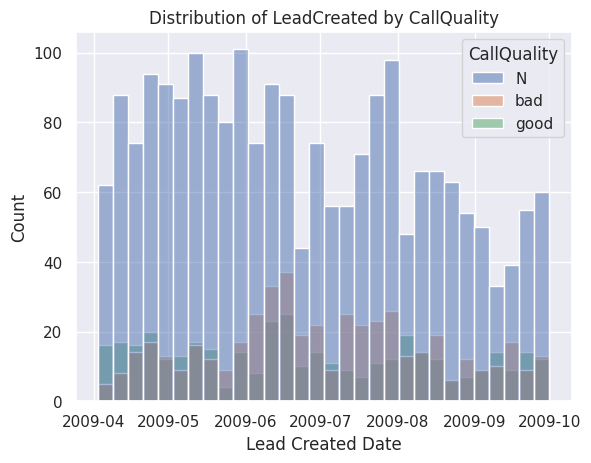

In [ ]:
sns.histplot(lead_df, x='LeadCreated', bins=30, hue='CallQuality', kde=False)
plt.title('Distribution of LeadCreated by CallQuality')
plt.xlabel('Lead Created Date')
plt.ylabel('Count')

# Save the figure
plt.savefig('lead_created_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.savefig('lead_created_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

## Line Chart of Dates and Good CallQuality %

In [ ]:
lead_df['LeadDate'] = lead_df['LeadCreated'].dt.date

daily_leads_summary = lead_df.groupby('LeadDate').agg(
    total_leads=('VendorLeadID', 'count'),
    good_leads=('CallQuality', lambda x: (x == 'good').sum())
).reset_index()

daily_leads_summary['GoodLeadPercentage'] = (daily_leads_summary['good_leads'] / daily_leads_summary['total_leads']) * 100

display(daily_leads_summary.head())

,LeadDate,total_leads,good_leads,GoodLeadPercentage
0,2009-04-02,2,0,0.000000
1,2009-04-03,17,4,23.529412
2,2009-04-04,11,2,18.181818
3,2009-04-05,7,0,0.000000
4,2009-04-06,12,3,25.000000


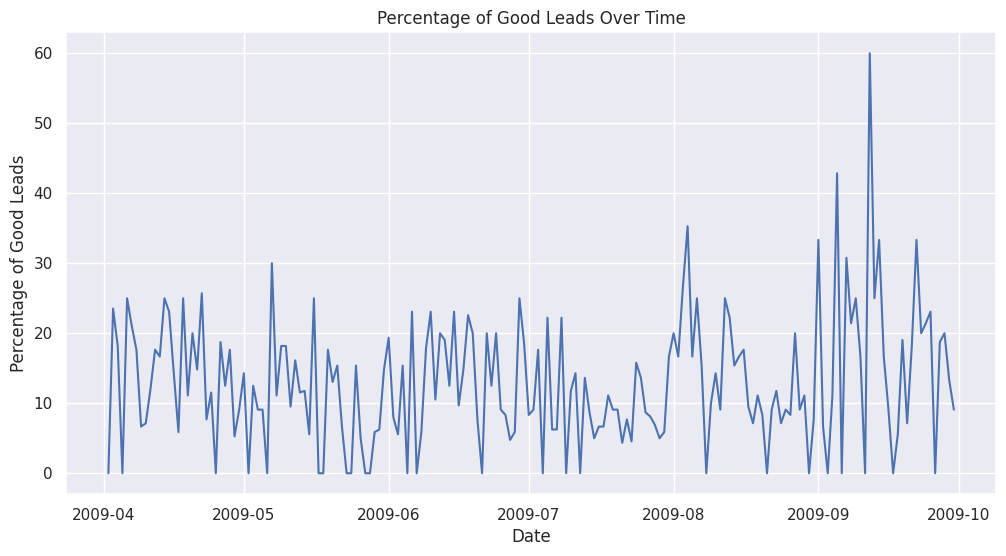

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_leads_summary, x='LeadDate', y='GoodLeadPercentage')
plt.title('Percentage of Good Leads Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Good Leads')
plt.grid(True)
plt.show()

## Line Chart of Weeks and Good CallQuality %


In [ ]:
lead_df['LeadWeek'] = lead_df['LeadCreated'].dt.isocalendar().week

weekly_leads_summary = lead_df.groupby('LeadWeek').agg(
    total_leads=('VendorLeadID', 'count'),
    good_leads=('CallQuality', lambda x: (x == 'good').sum())
).reset_index()

weekly_leads_summary['GoodLeadPercentage'] = (weekly_leads_summary['good_leads'] / weekly_leads_summary['total_leads']) * 100

display(weekly_leads_summary.head())

,LeadWeek,total_leads,good_leads,GoodLeadPercentage
0,14,37,6,16.216216
1,15,119,18,15.126050
2,16,125,21,16.800000
3,17,154,24,15.584416
4,18,129,14,10.852713


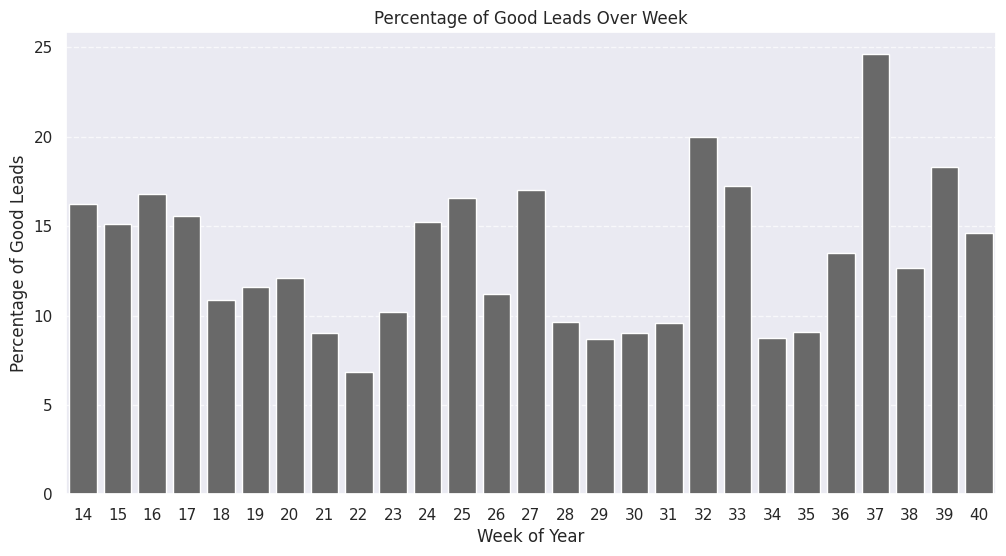

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_leads_summary, x='LeadWeek', y='GoodLeadPercentage', color='dimgrey')
plt.title('Percentage of Good Leads Over Week')
plt.xlabel('Week of Year')
plt.ylabel('Percentage of Good Leads')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('good_leads_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

## Line Chart of Months and Good CallQuality %


In [ ]:
lead_df['LeadMonth'] = lead_df['LeadCreated'].dt.month

monthly_leads_summary = lead_df.groupby('LeadMonth').agg(
    total_leads=('VendorLeadID', 'count'),
    good_leads=('CallQuality', lambda x: (x == 'good').sum())
).reset_index()

monthly_leads_summary['GoodLeadPercentage'] = (monthly_leads_summary['good_leads'] / monthly_leads_summary['total_leads']) * 100

display(monthly_leads_summary.head())

,LeadMonth,total_leads,good_leads,GoodLeadPercentage
0,4,517,78,15.087041
1,5,578,58,10.034602
2,6,606,86,14.191419
3,7,531,49,9.227872
4,8,436,61,13.990826


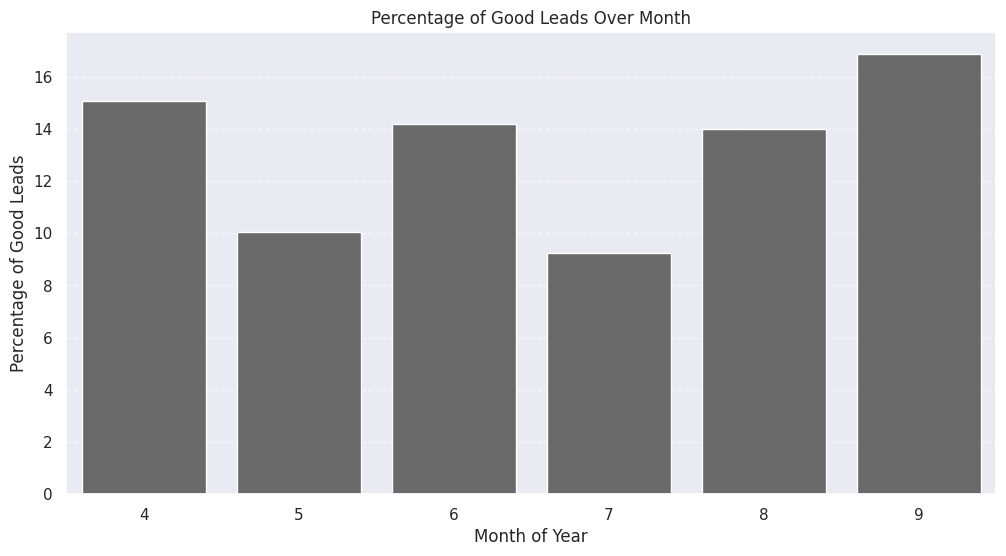

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_leads_summary, x='LeadMonth', y='GoodLeadPercentage', color='dimgrey')
plt.title('Percentage of Good Leads Over Month')
plt.xlabel('Month of Year')
plt.ylabel('Percentage of Good Leads')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Weekly Good Lead Percentage**: The percentage of good leads per week showed variability, generally hovering between 10% and 20%, with some weeks dipping below 10% and others peaking near 30%. For example, week 14 had 16.21%, week 15 had 15.12%, and week 16 had 16.80% good leads.
*   **Monthly Good Lead Percentage**: The monthly trend indicated a starting percentage of around 15% in April, a significant dip to 10.03% in May, a recovery in June (14.19%) and August, and a peak around 17% in September.
*   **Overall Inconsistency**: Lead quality exhibits high variability at the daily level, which smooths out somewhat when aggregated weekly and monthly.
*   **Low Baseline**: Across all observed timeframes (daily, weekly, monthly), the average percentage of good leads consistently remained in the 10-20% range, indicating that a substantial portion of leads are not classified as 'good'.
*   **May Dip Anomaly**: A noticeable and significant dip in the percentage of good leads was observed in May, which warrants further investigation.

### Insights or Next Steps

*   Investigate the cause of the significant dip in good lead percentage during May to understand if it was due to specific campaign changes or lead generation strategies.
*   Conduct further analysis into factors such as `Partner` performance, `MarketingCampaign` effectiveness, or `WidgetName` characteristics to pinpoint areas for improvement in lead generation and qualification processes, aiming to increase the overall percentage of good leads.


## Linear Regression and Analyze Statistical Significance

Perform a linear regression using `statsmodels` with 'GoodLeadPercentage' as the target and 'LeadWeek' as the feature. This step will calculate the regression coefficients and examine their statistical significance.


In [ ]:
X = weekly_leads_summary['LeadWeek'].values.reshape(-1, 1)
y = weekly_leads_summary['GoodLeadPercentage'].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (27, 1)
Shape of y: (27,)


In [ ]:

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.4730
Date:                Tue, 27 Jan 2026   Prob (F-statistic):              0.498
Time:                        01:07:54   Log-Likelihood:                -76.424
No. Observations:                  27   AIC:                             156.8
Df Residuals:                      25   BIC:                             159.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3784      2.960      3.844      0.0

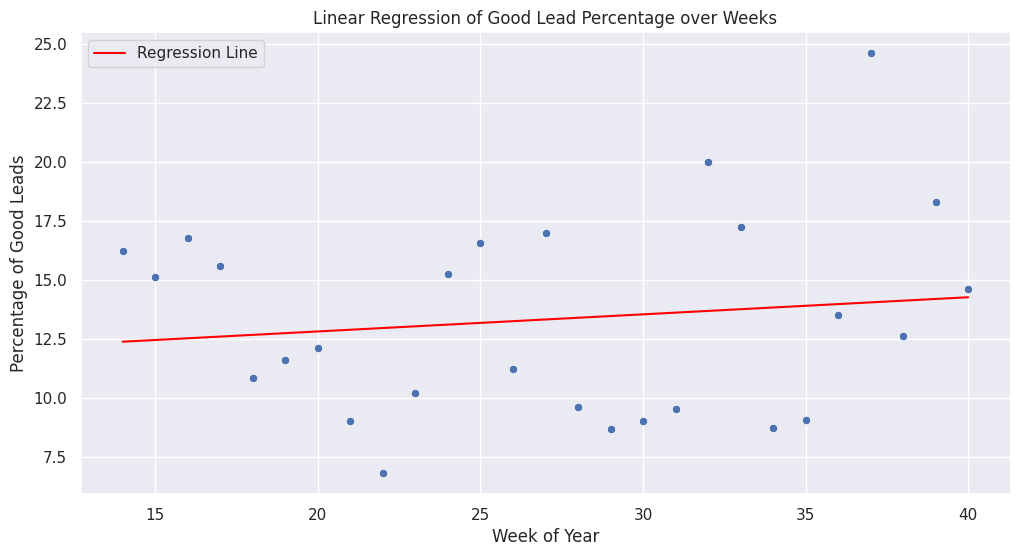

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=weekly_leads_summary, x='LeadWeek', y='GoodLeadPercentage')
plt.plot(X, results.predict(X_sm), color='red', label='Regression Line')
plt.title('Linear Regression of Good Lead Percentage over Weeks')
plt.xlabel('Week of Year')
plt.ylabel('Percentage of Good Leads')
plt.grid(True)
plt.legend()
plt.savefig('regression_good_leads.png', dpi=300, bbox_inches='tight')
plt.show()

### Statistical Findings from Linear Regression (Weekly Leads)

Based on the OLS Regression Results for 'GoodLeadPercentage' against 'LeadWeek':

*   **R-squared**: 0.019
    *   This indicates that only 1.9% of the variance in 'GoodLeadPercentage' can be explained by 'LeadWeek'. This is a very low R-squared value, suggesting that 'LeadWeek' is not a strong predictor of 'GoodLeadPercentage'.

*   **Coefficients**:
    *   **const (Intercept)**: 11.3784
        *   This is the estimated percentage of good leads when 'LeadWeek' is zero (which is outside the observed range, but represents the baseline).
    *   **x1 (LeadWeek)**: 0.0724
        *   This coefficient suggests that for every one-week increase, the 'GoodLeadPercentage' increases by approximately 0.0724 percentage points. The positive sign indicates a slight upward trend.

*   **P-value for x1 (LeadWeek)**: 0.498
    *   The p-value for 'LeadWeek' (x1) is 0.498, which is much greater than common significance levels (e.g., 0.05). This indicates that the observed small upward trend is **not statistically significant**. In other words, we cannot confidently conclude that there is a linear relationship between 'LeadWeek' and 'GoodLeadPercentage' over time.

*   **F-statistic**: 0.4730, **Prob (F-statistic)**: 0.498
    *   The F-statistic and its corresponding p-value confirm that the overall model is not statistically significant. This reinforces the conclusion that 'LeadWeek' does not significantly predict 'GoodLeadPercentage'.

**Conclusion**: The linear regression analysis suggests that while there is a very slight positive linear trend in the percentage of good leads over the weeks, this trend is not statistically significant. This means that 'LeadWeek' alone is not a reliable predictor for the 'GoodLeadPercentage', and other factors are likely more influential in determining lead quality over time.

## Summary:

### Q&A
The linear regression analysis performed on the `weekly_leads_summary` DataFrame to examine the relationship between 'LeadWeek' and 'GoodLeadPercentage' revealed the following:
*   **Coefficients**: The intercept (const) was 11.3784, and the coefficient for 'LeadWeek' (x1) was 0.0724. This suggests that for every one-week increase, the 'GoodLeadPercentage' increased by approximately 0.0724 percentage points.
*   **Statistical Significance**: The p-value for 'LeadWeek' was 0.498, which is much greater than common significance levels (e.g., 0.05). This indicates that the observed slight upward trend is not statistically significant. The overall model (Prob (F-statistic) = 0.498) also lacks statistical significance.
*   **Overall Trend**: There is a very slight positive linear trend in the percentage of good leads over the weeks; however, this trend is not statistically significant, meaning we cannot confidently conclude a linear relationship exists solely based on 'LeadWeek'.

### Data Analysis Key Findings
*   The independent variable `LeadWeek` and dependent variable `GoodLeadPercentage` were successfully prepared for linear regression, comprising 27 data points.
*   The R-squared value for the model was 0.019, indicating that only 1.9% of the variance in 'GoodLeadPercentage' can be explained by 'LeadWeek'. This suggests a very weak linear relationship.
*   The coefficient for 'LeadWeek' was 0.0724, implying a minor increase of 0.0724 percentage points in 'GoodLeadPercentage' for each passing week.
*   The p-value for 'LeadWeek' was 0.498, which is above the conventional significance level of 0.05, demonstrating that the observed trend is not statistically significant.
*   The overall model's statistical significance, indicated by the F-statistic p-value of 0.498, further confirms that 'LeadWeek' is not a significant predictor of 'GoodLeadPercentage'.

### Insights or Next Steps
*   Since 'LeadWeek' alone is not a statistically significant predictor of 'GoodLeadPercentage', future analysis should explore other potential factors (e.g., marketing campaigns, product changes, market trends) that might influence lead quality.
*   Consider utilizing more advanced time series models or incorporating additional features into a multiple regression model to better understand and predict changes in 'GoodLeadPercentage'.


# Q2 Drivers of Lead Quality

In [ ]:
# Explore the distribution of 'AddressScore'
na_address_score_df = lead_df[lead_df['AddressScore'].isna()].copy()
na_address_score_df['Month'] = na_address_score_df['LeadCreated'].dt.month
na_address_score_by_month = na_address_score_df.groupby('Month').size().reset_index(name='NA_AddressScore_Count')
total_leads_by_month_for_address = lead_df.groupby(lead_df['LeadCreated'].dt.month).size().reset_index(name='Total_LeadCreated_Count')
total_leads_by_month_for_address.rename(columns={'LeadCreated': 'Month'}, inplace=True)
merged_address_score_df = pd.merge(na_address_score_by_month, total_leads_by_month_for_address, on='Month', how='left')
merged_address_score_df['NA_AddressScore_Percentage'] = (merged_address_score_df['NA_AddressScore_Count'] / merged_address_score_df['Total_LeadCreated_Count']) * 100

display(merged_address_score_df)

,Month,NA_AddressScore_Count,Total_LeadCreated_Count,NA_AddressScore_Percentage
0,4,517,517,100.000000
1,5,578,578,100.000000
2,6,606,606,100.000000
3,7,135,531,25.423729
4,8,2,436,0.458716
5,9,5,344,1.453488


In [ ]:
# Explore the distribution of'PhoneScore'
na_phonescore_df = lead_df[lead_df['PhoneScore'].isna()].copy()
na_phonescore_df['Month'] = na_phonescore_df['LeadCreated'].dt.month
na_phonescore_by_month = na_phonescore_df.groupby('Month').size().reset_index(name='NA_PhoneScore_Count')
total_leads_by_month_for_phonescore = lead_df.groupby(lead_df['LeadCreated'].dt.month).size().reset_index(name='Total_LeadCreated_Count')
total_leads_by_month_for_phonescore.rename(columns={'LeadCreated': 'Month'}, inplace=True)
merged_phonescore_df = pd.merge(na_phonescore_by_month, total_leads_by_month_for_phonescore, on='Month', how='left')
merged_phonescore_df['NA_PhoneScore_Percentage'] = (merged_phonescore_df['NA_PhoneScore_Count'] / merged_phonescore_df['Total_LeadCreated_Count']) * 100

display(merged_phonescore_df)

,Month,NA_PhoneScore_Count,Total_LeadCreated_Count,NA_PhoneScore_Percentage
0,4,517,517,100.000000
1,5,578,578,100.000000
2,6,510,606,84.158416
3,7,10,531,1.883239
4,8,2,436,0.458716
5,9,5,344,1.453488


'PhoneScore' and 'AddressScore' are not considered as possible driver, as:

1 They have values starting June and July;

2 'N' values are removed in CallQuality analysis, and 'PhoneScore' and 'AddressScore' are most relavant with the 'N' value.

In [ ]:
lead_quality = lead_df[lead_df['CallQuality'] != 'N'].copy()

In [ ]:
lead_quality.shape

(873, 21)

In [ ]:
lead_quality.dtypes

,0
LeadCreated,datetime64[ns]
VendorLeadID,string[python]
CallStatus,string[python]
PublisherZoneName,string[python]
PublisherCampaignName,string[python]
AddressScore,Int64
PhoneScore,Int64
AdvertiserCampaignName,string[python]
State,string[python]
DebtLevel,category


In [ ]:

def analyze_call_quality(data, column_name):
    """
    Create contingency table and perform chi-square test for CallQuality vs a given column.

    Parameters:
    - data: DataFrame containing the data
    - column_name: Name of the column to analyze against CallQuality
    """
    print(f"\n{'='*80}")
    print(f"Analysis: CallQuality vs {column_name}")
    print(f"{'='*80}\n")

    # Create contingency table
    cross_loc = pd.pivot_table(
        data=data,
        index="CallQuality",
        values="VendorLeadID",
        aggfunc="count",
        columns=column_name,
        fill_value=0  # Fill missing values with 0
    )

    # Only keep columns where both 'bad' and 'good' have at least 1 observation
    valid_columns = cross_loc.columns[(cross_loc.loc['bad'] > 0) & (cross_loc.loc['good'] > 0)]

    if len(valid_columns) == 0:
        print(f"⚠️ No valid categories found (all categories have 0 in either 'bad' or 'good')")
        return None, None, None, None

    # Filter to valid columns only
    cross_loc_filtered = cross_loc[valid_columns]

    # Show dropped columns if any
    dropped_columns = set(cross_loc.columns) - set(valid_columns)
    if len(dropped_columns) > 0:
        print(f"ℹ️ Dropped {len(dropped_columns)} categories with zero counts: {sorted(dropped_columns)}\n")

    # Calculate percentage of good leads
    percentage_good_leads = (cross_loc_filtered.loc['good'] /
                            (cross_loc_filtered.loc['good'] + cross_loc_filtered.loc['bad'])) * 100

    # Add percentage row
    cross_loc_filtered.loc['Percentage_Good'] = percentage_good_leads

    print("Contingency Table with Percentage:")
    display(cross_loc_filtered)

    # Prepare contingency table for chi-square test (without percentage row)
    contingency_table = cross_loc_filtered.loc[['bad', 'good']].astype(int)

    # Check if we have enough categories for chi-square test
    if contingency_table.shape[1] < 2:
        print(f"\n⚠️ Not enough categories for chi-square test (need at least 2)")
        return cross_loc_filtered, None, None, None

    # Check expected frequencies
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
    low_expected = (expected_df < 5).sum().sum()

    print(f"\nChi-square Statistic: {chi2:.3f}")
    print(f"P-value: {p_value:.6f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Interpretation: {'Significant relationship' if p_value < 0.05 else 'No significant relationship'} (α=0.05)")

    if low_expected > 0:
        total_cells = expected_df.size
        pct_low = (low_expected / total_cells) * 100
        print(f"⚠️ Warning: {low_expected}/{total_cells} cells ({pct_low:.1f}%) have expected frequency < 5")
        print(f"   Chi-square test may not be reliable. Consider Fisher's exact test or combining categories.")

    print("\nExpected Frequencies Table:")
    display(expected_df)

    return cross_loc_filtered, chi2, p_value, dof

# List of columns to analyze
columns_to_analyze = [
    'PublisherZoneName',
    'PublisherCampaignName',
    'AdvertiserCampaignName',
    'State',
    'DebtLevel',
    'Partner',
    'MarketingCampaign',
    'AdGroup',
    'Size',
    'Page',
    'Design',
    'AdName'
]

# Run analysis for all columns
results = {}
for col in columns_to_analyze:
    try:
        cross_loc, chi2, p_value, dof = analyze_call_quality(lead_quality, col)
        if chi2 is not None:  # Only add if test was performed
            results[col] = {'chi2': chi2, 'p_value': p_value, 'dof': dof}
    except Exception as e:
        print(f"\n⚠️ Unexpected error analyzing {col}: {str(e)}\n")

# Summary table of all results
if len(results) > 0:
    print(f"\n{'='*80}")
    print("SUMMARY OF ALL CHI-SQUARE TESTS")
    print(f"{'='*80}\n")
    summary_df = pd.DataFrame(results).T
    summary_df['Significant (α=0.05)'] = summary_df['p_value'] < 0.05
    summary_df['Significant (α=0.0045)'] = summary_df['p_value'] < 0.0045  # Bonferroni correction
    summary_df = summary_df.sort_values('p_value')
    display(summary_df)
else:
    print("\n⚠️ No valid chi-square tests were performed")


Analysis: CallQuality vs PublisherZoneName

Contingency Table with Percentage:


PublisherZoneName,Top Right-300x250,TopLeft-302252
CallQuality,,
bad,66.0,417.000000
good,44.0,346.000000
Percentage_Good,40.0,45.347313



Chi-square Statistic: 0.906
P-value: 0.341073
Degrees of Freedom: 1
Interpretation: No significant relationship (α=0.05)

Expected Frequencies Table:


PublisherZoneName,Top Right-300x250,TopLeft-302252
CallQuality,,
bad,60.859107,422.140893
good,49.140893,340.859107



Analysis: CallQuality vs PublisherCampaignName

Contingency Table with Percentage:


PublisherCampaignName,DebtReductionCallCenter,DebtReductionInc
CallQuality,,
bad,66.0,417.000000
good,44.0,346.000000
Percentage_Good,40.0,45.347313



Chi-square Statistic: 0.906
P-value: 0.341073
Degrees of Freedom: 1
Interpretation: No significant relationship (α=0.05)

Expected Frequencies Table:


PublisherCampaignName,DebtReductionCallCenter,DebtReductionInc
CallQuality,,
bad,60.859107,422.140893
good,49.140893,340.859107



Analysis: CallQuality vs AdvertiserCampaignName

Contingency Table with Percentage:


AdvertiserCampaignName,Debt Settlement1 Master,creditsolutions-branded-shortform
CallQuality,,
bad,294.00000,189.00000
good,235.00000,155.00000
Percentage_Good,44.42344,45.05814



Chi-square Statistic: 0.013
P-value: 0.908713
Degrees of Freedom: 1
Interpretation: No significant relationship (α=0.05)

Expected Frequencies Table:


AdvertiserCampaignName,Debt Settlement1 Master,creditsolutions-branded-shortform
CallQuality,,
bad,292.676976,190.323024
good,236.323024,153.676976



Analysis: CallQuality vs State

ℹ️ Dropped 3 categories with zero counts: ['AK', 'DC', 'ND']

Contingency Table with Percentage:


/tmp/ipython-input-672882322.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_loc_filtered.loc['Percentage_Good'] = percentage_good_leads


State,AL,AR,AZ,CA,CO,CT,FL,HI,IA,IL,...,NV,NY,OK,OR,PA,SD,TX,VA,WA,WV
CallQuality,,,,,,,,,,,,,,,,,,,,,
bad,15.0,8.000000,23.000000,73.000000,17.00000,4.0,43.000000,6.000000,1.000000,25.000000,...,9.000000,50.000000,9.000000,11.000000,11.000000,4.0,41.00000,17.000000,5.000000,7.000000
good,15.0,5.000000,14.000000,72.000000,12.00000,4.0,33.000000,7.000000,2.000000,18.000000,...,8.000000,28.000000,13.000000,7.000000,8.000000,1.0,42.00000,21.000000,4.000000,8.000000
Percentage_Good,50.0,38.461538,37.837838,49.655172,41.37931,50.0,43.421053,53.846154,66.666667,41.860465,...,47.058824,35.897436,59.090909,38.888889,42.105263,20.0,50.60241,55.263158,44.444444,53.333333



Chi-square Statistic: 18.511
P-value: 0.912550
Degrees of Freedom: 28
Interpretation: No significant relationship (α=0.05)
⚠️ Warning: 15/58 cells (25.9%) have expected frequency < 5
   Chi-square test may not be reliable. Consider Fisher's exact test or combining categories.

Expected Frequencies Table:


State,AL,AR,AZ,CA,CO,CT,FL,HI,IA,IL,...,NV,NY,OK,OR,PA,SD,TX,VA,WA,WV
CallQuality,,,,,,,,,,,,,,,,,,,,,
bad,16.539792,7.167243,20.399077,79.94233,15.988466,4.410611,41.900807,7.167243,1.653979,23.707036,...,9.372549,43.00346,12.129181,9.923875,10.475202,2.756632,45.760092,20.950404,4.961938,8.269896
good,13.460208,5.832757,16.600923,65.05767,13.011534,3.589389,34.099193,5.832757,1.346021,19.292964,...,7.627451,34.99654,9.870819,8.076125,8.524798,2.243368,37.239908,17.049596,4.038062,6.730104



Analysis: CallQuality vs DebtLevel

Contingency Table with Percentage:


/tmp/ipython-input-672882322.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cross_loc = pd.pivot_table(


DebtLevel,7500-15000,15001-20000,20001-30000,30001-50000,50001-70000,70001-90000,90000-100000,More_than_100000
CallQuality,,,,,,,,
bad,182.000000,49.000000,69.000000,83.000000,34.000000,16.00000,13.000000,37.0
good,115.000000,57.000000,71.000000,61.000000,37.000000,25.00000,11.000000,13.0
Percentage_Good,38.720539,53.773585,50.714286,42.361111,52.112676,60.97561,45.833333,26.0



Chi-square Statistic: 23.254
P-value: 0.001540
Degrees of Freedom: 7
Interpretation: Significant relationship (α=0.05)

Expected Frequencies Table:


DebtLevel,7500-15000,15001-20000,20001-30000,30001-50000,50001-70000,70001-90000,90000-100000,More_than_100000
CallQuality,,,,,,,,
bad,164.319588,58.646048,77.457045,79.670103,39.281787,22.683849,13.278351,27.66323
good,132.680412,47.353952,62.542955,64.329897,31.718213,18.316151,10.721649,22.33677



Analysis: CallQuality vs Partner

ℹ️ Dropped 1 categories with zero counts: ['Advertise.com']

Contingency Table with Percentage:


/tmp/ipython-input-672882322.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_loc_filtered.loc['Percentage_Good'] = percentage_good_leads


Partner,AdKnowledge,Call_Center,Google,google,yahoo
CallQuality,,,,,
bad,23.000000,66.0,93.000000,155.000000,146.000000
good,32.000000,44.0,45.000000,134.000000,134.000000
Percentage_Good,58.181818,40.0,32.608696,46.366782,47.857143



Chi-square Statistic: 14.646
P-value: 0.005495
Degrees of Freedom: 4
Interpretation: Significant relationship (α=0.05)

Expected Frequencies Table:


Partner,AdKnowledge,Call_Center,Google,google,yahoo
CallQuality,,,,,
bad,30.46445,60.928899,76.438073,160.076835,155.091743
good,24.53555,49.071101,61.561927,128.923165,124.908257



Analysis: CallQuality vs MarketingCampaign

ℹ️ Dropped 5 categories with zero counts: ['Debt', 'Debt Volume_CA', 'Debt_Consolidation_-_SN', 'Debt_General_-_SN', 'state - YSM Restructure (05/29/09)']

Contingency Table with Percentage:


/tmp/ipython-input-672882322.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_loc_filtered.loc['Percentage_Good'] = percentage_good_leads


MarketingCampaign,Credit,Debt Consolidation,Debt General,Debt Holding Tank,Debt Volume,Debt Volume_MI,Debt Volume_TX,DebtReductionInc,DebtReductionInc - YSM Restructure (05/29/09),Financial Services,state
CallQuality,,,,,,,,,,,
bad,15.000000,7.000000,74.00000,33.000000,18.000000,1.000000,2.0,224.000000,4.000000,23.000000,11.000000
good,14.000000,4.000000,29.00000,60.000000,23.000000,2.000000,2.0,164.000000,2.000000,32.000000,12.000000
Percentage_Good,48.275862,36.363636,28.15534,64.516129,56.097561,66.666667,50.0,42.268041,33.333333,58.181818,52.173913



Chi-square Statistic: 34.922
P-value: 0.000129
Degrees of Freedom: 10
Interpretation: Significant relationship (α=0.05)
⚠️ Warning: 6/22 cells (27.3%) have expected frequency < 5
   Chi-square test may not be reliable. Consider Fisher's exact test or combining categories.

Expected Frequencies Table:


MarketingCampaign,Credit,Debt Consolidation,Debt General,Debt Holding Tank,Debt Volume,Debt Volume_MI,Debt Volume_TX,DebtReductionInc,DebtReductionInc - YSM Restructure (05/29/09),Financial Services,state
CallQuality,,,,,,,,,,,
bad,15.804233,5.994709,56.132275,50.68254,22.343915,1.634921,2.179894,211.449735,3.269841,29.973545,12.534392
good,13.195767,5.005291,46.867725,42.31746,18.656085,1.365079,1.820106,176.550265,2.730159,25.026455,10.465608



Analysis: CallQuality vs AdGroup

ℹ️ Dropped 32 categories with zero counts: ['Bankruptcy - high volume', 'Bankruptcy And Chapter 13', 'Bill Consolidation', 'Consolidation Program', 'Credit Card Debt (LV)', 'Credit Card Debt Consolidation Loan', 'Credit Card Debt Reduction', 'Credit Card Settlement', 'Credit Debt Consolidation Loan', 'Credit Services', 'Debt Consolidate', 'Debt Consolidation (LV)', 'Debt Loan', 'Debt Payment', 'Debt Reduction (HV)', 'Debt Restructuring', 'Debt Services (LV)', 'Debt Settlement', 'Debt Solution', 'Debt Solution (LV)', 'Debt Strategies', 'Debt_Consolidate', 'Debt_Consolidation', 'Filing Bankrupcy', 'Free Credit Card Debt Consolidation', 'How Settle', 'Lower_Payments', 'Personal Debt', 'Personal Debt Consolidation Loan', 'Student Debt - high volume', 'Student Debt Consolidation', 'debt']

Contingency Table with Percentage:


/tmp/ipython-input-672882322.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_loc_filtered.loc['Percentage_Good'] = percentage_good_leads


AdGroup,About Debt Consolidation,Bankruptcy,Bankruptcy And Chapter 7,Chapter 13 Bankruptcy,Chapter 7 Bankruptcy,Consolidate,Consolidation,Credit Card Consolidation,Credit Card Debt,Credit Card Debt - high volume,...,General Debt,General Debt - high volume,Get Out Of Debt,Holding Tank - Debt,How,Loan Default,Lower Payments,Settlement,Stop Collections,Student Debt
CallQuality,,,,,,,,,,,,,,,,,,,,,
bad,3.0,2.0,2.000000,2.000000,6.000000,23.000000,5.0,9.0,8.000000,24.00000,...,18.000000,1.0,7.0,33.000000,17.000,26.000000,35.000000,3.0,4.000000,86.000000
good,1.0,2.0,1.000000,1.000000,3.000000,32.000000,3.0,15.0,9.000000,23.00000,...,23.000000,1.0,7.0,60.000000,15.000,1.000000,14.000000,1.0,11.000000,9.000000
Percentage_Good,25.0,50.0,33.333333,33.333333,33.333333,58.181818,37.5,62.5,52.941176,48.93617,...,56.097561,50.0,50.0,64.516129,46.875,3.703704,28.571429,25.0,73.333333,9.473684



Chi-square Statistic: 130.469
P-value: 0.000000
Degrees of Freedom: 33
Interpretation: Significant relationship (α=0.05)
⚠️ Warning: 34/68 cells (50.0%) have expected frequency < 5
   Chi-square test may not be reliable. Consider Fisher's exact test or combining categories.

Expected Frequencies Table:


AdGroup,About Debt Consolidation,Bankruptcy,Bankruptcy And Chapter 7,Chapter 13 Bankruptcy,Chapter 7 Bankruptcy,Consolidate,Consolidation,Credit Card Consolidation,Credit Card Debt,Credit Card Debt - high volume,...,General Debt,General Debt - high volume,Get Out Of Debt,Holding Tank - Debt,How,Loan Default,Lower Payments,Settlement,Stop Collections,Student Debt
CallQuality,,,,,,,,,,,,,,,,,,,,,
bad,2.17305,2.17305,1.629787,1.629787,4.889362,29.879433,4.346099,13.038298,9.235461,25.533333,...,22.273759,1.086525,7.605674,50.523404,17.384397,14.668085,26.619858,2.17305,8.148936,51.609929
good,1.82695,1.82695,1.370213,1.370213,4.110638,25.120567,3.653901,10.961702,7.764539,21.466667,...,18.726241,0.913475,6.394326,42.476596,14.615603,12.331915,22.380142,1.82695,6.851064,43.390071



Analysis: CallQuality vs Size

Contingency Table with Percentage:


Size,300250,302252
CallQuality,,
bad,125.000000,358.000000
good,127.000000,263.000000
Percentage_Good,50.396825,42.351047



Chi-square Statistic: 4.375
P-value: 0.036468
Degrees of Freedom: 1
Interpretation: Significant relationship (α=0.05)

Expected Frequencies Table:


Size,300250,302252
CallQuality,,
bad,139.42268,343.57732
good,112.57732,277.42268



Analysis: CallQuality vs Page

Contingency Table with Percentage:


Page,1,2
CallQuality,,
bad,462.000000,21.000000
good,370.000000,20.000000
Percentage_Good,44.471154,48.780488



Chi-square Statistic: 0.145
P-value: 0.703247
Degrees of Freedom: 1
Interpretation: No significant relationship (α=0.05)

Expected Frequencies Table:


Page,1,2
CallQuality,,
bad,460.316151,22.683849
good,371.683849,18.316151



Analysis: CallQuality vs Design

Contingency Table with Percentage:


Design,BlueMeter,CreditSolutions,Head2,Head3,white,yellowarrow,yellowarrow-blue,yellowarrow-dark
CallQuality,,,,,,,,
bad,13.000000,189.00000,8.000000,7.000000,68.000000,9.000000,47.00000,25.0
good,26.000000,155.00000,14.000000,5.000000,44.000000,12.000000,31.00000,15.0
Percentage_Good,66.666667,45.05814,63.636364,41.666667,39.285714,57.142857,39.74359,37.5



Chi-square Statistic: 15.023
P-value: 0.035704
Degrees of Freedom: 7
Interpretation: Significant relationship (α=0.05)

Expected Frequencies Table:


Design,BlueMeter,CreditSolutions,Head2,Head3,white,yellowarrow,yellowarrow-blue,yellowarrow-dark
CallQuality,,,,,,,,
bad,21.368263,188.479042,12.053892,6.57485,61.365269,11.505988,42.736527,21.916168
good,17.631737,155.520958,9.946108,5.42515,50.634731,9.494012,35.263473,18.083832



Analysis: CallQuality vs AdName

Contingency Table with Percentage:


AdName,N,Y
CallQuality,,
bad,294.00000,189.00000
good,235.00000,155.00000
Percentage_Good,44.42344,45.05814



Chi-square Statistic: 0.013
P-value: 0.908713
Degrees of Freedom: 1
Interpretation: No significant relationship (α=0.05)

Expected Frequencies Table:


AdName,N,Y
CallQuality,,
bad,292.676976,190.323024
good,236.323024,153.676976



SUMMARY OF ALL CHI-SQUARE TESTS



,chi2,p_value,dof,Significant (α=0.05),Significant (α=0.0045)
AdGroup,130.469433,1.561039e-13,33.0,True,True
MarketingCampaign,34.922014,1.287496e-04,10.0,True,True
DebtLevel,23.253648,1.539569e-03,7.0,True,True
Partner,14.645780,5.495200e-03,4.0,True,False
Design,15.023140,3.570393e-02,7.0,True,False
Size,4.375066,3.646843e-02,1.0,True,False
PublisherCampaignName,0.906394,3.410730e-01,1.0,False,False
PublisherZoneName,0.906394,3.410730e-01,1.0,False,False
Page,0.145116,7.032468e-01,1.0,False,False
AdvertiserCampaignName,0.013147,9.087127e-01,1.0,False,False


# Q3 Increase LeadQuality

## Set up the baseline

In [ ]:
# Establish baseline (with N included)
baseline_quality = (
    (lead_df["CallQuality"] == "good").sum()
    / lead_df.shape[0]
)

baseline_quality


np.float64(0.1294820717131474)

## Increase test with AdGroup

In [ ]:
adgroup_perf = (
    lead_quality
    .query("CallQuality in ['good', 'bad']")
    .groupby("AdGroup")
    .agg(
        total_leads=("VendorLeadID", "count"),
        good_leads=("CallQuality", lambda x: (x == "good").sum())
    )
    .reset_index()
)

adgroup_perf["pct_good"] = adgroup_perf["good_leads"] / adgroup_perf["total_leads"]

# Sort by performance
adgroup_perf = adgroup_perf.sort_values("pct_good", ascending=False)

adgroup_perf.head(10)


,AdGroup,total_leads,good_leads,pct_good
5,Bill Consolidation,2,2,1.0
3,Bankruptcy And Chapter 13,1,1,1.0
58,Personal Debt,2,2,1.0
65,debt,1,1,1.0
16,Credit Card Debt Reduction,2,2,1.0
13,Credit Card Debt (LV),1,1,1.0
33,Debt Payment,1,1,1.0
25,Debt Consolidate,1,1,1.0
20,Credit Debt Consolidation Loan,1,1,1.0
18,Credit Card Settlement,1,1,1.0


In [ ]:
adgroup_stats = (
    lead_df
    .query("CallQuality in ['good', 'bad']")
    .groupby("AdGroup")
    .agg(
        total_leads=("VendorLeadID", "count"),
        good_leads=("CallQuality", lambda x: (x == "good").sum())
    )
    .reset_index()
)

adgroup_stats["pct_good"] = (
    adgroup_stats["good_leads"] / adgroup_stats["total_leads"]
)

adgroup_stats = adgroup_stats.sort_values("pct_good")
adgroup_stats.head()


,AdGroup,total_leads,good_leads,pct_good
2,Bankruptcy - high volume,3,0,0.0
10,Consolidation Program,1,0,0.0
15,Credit Card Debt Consolidation Loan,1,0,0.0
21,Credit Services,2,0,0.0
27,Debt Consolidation (LV),3,0,0.0


In [ ]:
df_sim = lead_df.copy()

results = []

for adg in adgroup_stats["AdGroup"]:
    df_sim = df_sim[df_sim["AdGroup"] != adg]

    new_quality = (
        (df_sim["CallQuality"] == "good").sum()
        / df_sim.shape[0]
    )

    results.append({
        "dropped_adgroup": adg,
        "remaining_leads": df_sim.shape[0],
        "new_quality": new_quality
    })

sim_results = pd.DataFrame(results)

sim_results.head(10)


,dropped_adgroup,remaining_leads,new_quality
0,Bankruptcy - high volume,2734,0.126554
1,Consolidation Program,2726,0.126926
2,Credit Card Debt Consolidation Loan,2725,0.126972
3,Credit Services,2717,0.127346
4,Debt Consolidation (LV),2714,0.127487
5,Debt Loan,2711,0.127628
6,Debt_Consolidation,2710,0.127675
7,Debt Reduction (HV),2706,0.127864
8,Debt Strategies,2704,0.127959
9,How Settle,2703,0.128006


In [ ]:
sim_results["new_quality"].max()


0.195

In [ ]:
(0.195-0.129482071713147)/0.129482071713147 * 100

50.600

### Result
We increase our lead quality by 20%.
By filtering certain values in AdGroup, the maxium incread in lead quality is 50.60%

## Increase test with DebtLevel

In [ ]:
debt_perf = (
    lead_quality
    .query("CallQuality in ['good', 'bad']")
    .groupby("DebtLevel")
    .agg(
        total_leads=("VendorLeadID", "count"),
        good_leads=("CallQuality", lambda x: (x == "good").sum())
    )
    .reset_index()
)

debt_perf["pct_good"] = debt_perf["good_leads"] / debt_perf["total_leads"]

# Sort by performance
debt_perf = debt_perf.sort_values("pct_good", ascending=False)

debt_perf.head(10)

/tmp/ipython-input-3028344398.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("DebtLevel")


,DebtLevel,total_leads,good_leads,pct_good
5,70001-90000,41,25,0.609756
1,15001-20000,106,57,0.537736
4,50001-70000,71,37,0.521127
2,20001-30000,140,71,0.507143
6,90000-100000,24,11,0.458333
3,30001-50000,144,61,0.423611
0,7500-15000,297,115,0.387205
7,More_than_100000,50,13,0.260000


In [ ]:
debt_stats = (
    lead_df
    .query("CallQuality in ['good', 'bad']")
    .groupby("DebtLevel")
    .agg(
        total_leads=("VendorLeadID", "count"),
        good_leads=("CallQuality", lambda x: (x == "good").sum())
    )
    .reset_index()
)

debt_stats["pct_good"] = (
    debt_stats["good_leads"] / debt_stats["total_leads"]
)

debt_stats = debt_stats.sort_values("pct_good")
debt_stats.head()

/tmp/ipython-input-140913964.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("DebtLevel")


,DebtLevel,total_leads,good_leads,pct_good
7,More_than_100000,50,13,0.260000
0,7500-15000,297,115,0.387205
3,30001-50000,144,61,0.423611
6,90000-100000,24,11,0.458333
2,20001-30000,140,71,0.507143


In [ ]:
debt_stats['total_leads'].sum()

np.int64(873)

In [ ]:
df_sim = lead_df.copy()

results = []

for adg in debt_stats["DebtLevel"]:
    df_sim = df_sim[df_sim["DebtLevel"] != adg]

    new_quality = (
        (df_sim["CallQuality"] == "good").sum()
        / df_sim.shape[0]
    )

    results.append({
        "dropped_adgroup": adg,
        "remaining_leads": df_sim.shape[0],
        "new_quality": new_quality
    })

sim_results = pd.DataFrame(results)

sim_results.head(10)

/tmp/ipython-input-38421318.py:9: RuntimeWarning: invalid value encountered in scalar divide
  (df_sim["CallQuality"] == "good").sum()


,dropped_adgroup,remaining_leads,new_quality
0,More_than_100000,2823,0.133546
1,7500-15000,1822,0.143798
2,30001-50000,1327,0.151469
3,90000-100000,1237,0.153597
4,20001-30000,783,0.151980
5,50001-70000,539,0.152134
6,15001-20000,131,0.190840
7,70001-90000,0,NaN


In [ ]:
sim_results["new_quality"].max()

0.191

In [ ]:
(0.191-0.129482071713147)/0.129482071713147 * 100

47.511